[Probability and Statistics for Data Science](https://www.ps4ds.net/) 

Code for Figure 9.23

Bootstrap approximation to the distribution of the sample mean in a scenario where we know the true population mean\
Topics: The bootstrap, bootstrap standard error, sample mean

Author: Carlos Fernandez-Granda\
Data source: http://mreed.umtri.umich.edu/mreed/downloads.html

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats
from scipy.stats import norm
from numpy.random import default_rng
import matplotlib
matplotlib.rcParams['text.usetex'] = True
rng = default_rng(2021)

font_size = 15
font_size_legend = 15
font_size_ticks = 15

data = pd.read_csv ("../data/ANSUR II MALE Public.csv", encoding='latin-1')

stature = data['stature'] / 10.
N = len(stature)
population_mean = np.mean(stature)
population_std = np.std(stature)
print("N: " + str(len(stature)))
print("Population mean: " + str(round(population_mean,2)))
print("Population standard deviation: " + str(round(population_std,2)))

N: 4082
Population mean: 175.62
Population standard deviation: 6.85


In [3]:
n = 400

rng = default_rng(1234)
tries_sm = int(1e6)
sample_means = np.zeros(tries_sm)
for ind_tries in range(tries_sm):
    samples = rng.choice(stature,n,replace=True)
    sample_means[ind_tries] = np.mean(samples)

Standard error: 0.343


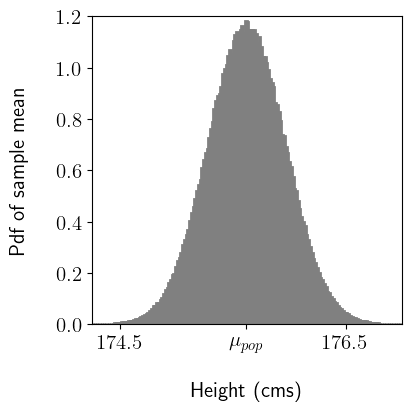

In [6]:
n_bins_dens = 200
x_min_dens = 174.25
x_max_dens = 177
y_max_dens = 1.2

plt.figure(figsize=(4,4))
plt.xticks([174.5,175.62,176.5],[r'$174.5$',r'$\mu_{pop}$',r'$176.5$'],fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.hist(sample_means,bins=n_bins_dens,color='gray', edgecolor='gray',
              linewidth=2,density=True)
plt.ylim([0,y_max_dens])
plt.xlim([x_min_dens,x_max_dens])
plt.ylabel(r"Pdf of sample mean",fontsize=font_size,labelpad=5)
plt.xlabel('Height (cms)',fontsize=font_size,labelpad=5)

print("Standard error: " + str(round(np.std(sample_means),3)))

Sample mean: 175.792
Sample std: 6.794
Estimate of standard error based on sample std: 0.3401


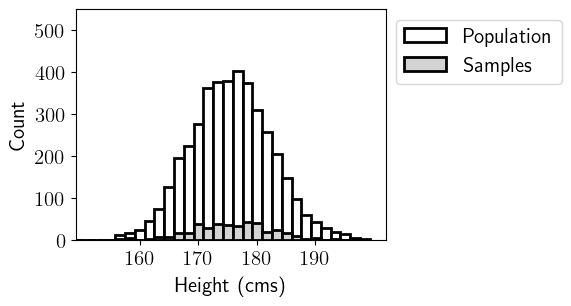

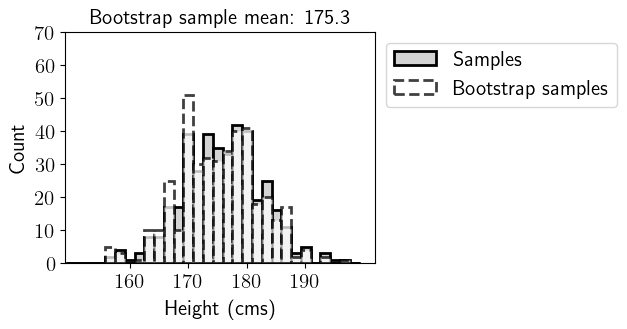

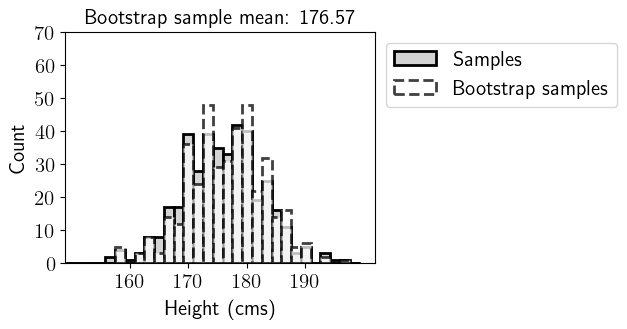

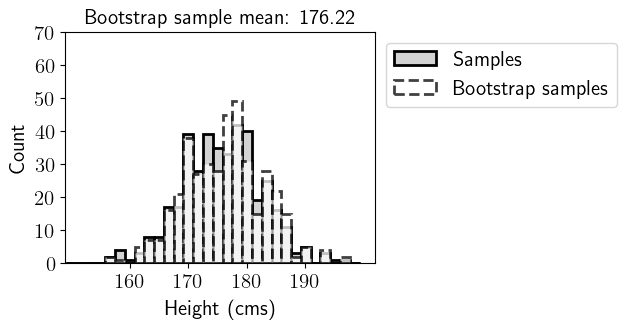

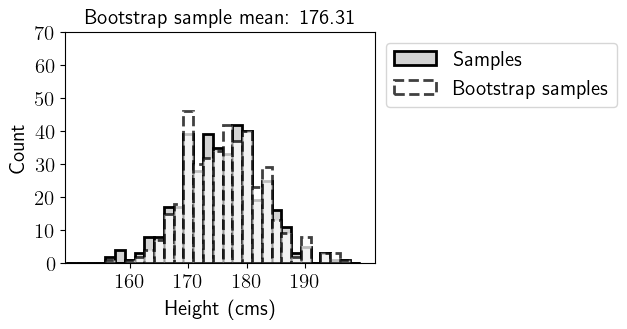

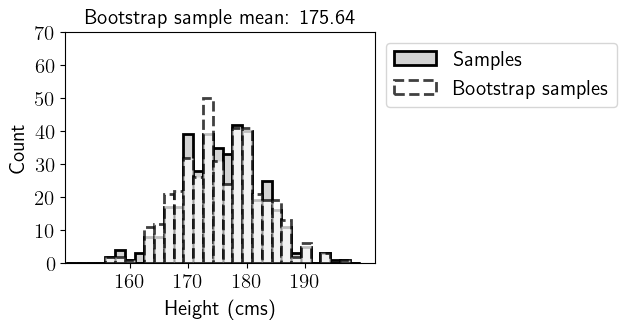

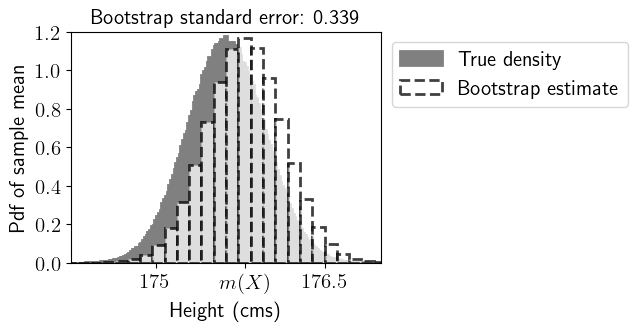

In [20]:
rng = default_rng(2021)

n_bs_plot = 5
tries = 1
n_bins = 30
x_min = 149
x_max = 202
y_max = 70
y_max_pop = 550

tries_bs = int(1e6)

for ind in range(tries):
    samples = rng.choice(stature,n,replace=True)
    
    plt.figure(figsize=(4,3))
    plt.xticks(np.arange(160,200,10),fontsize=font_size_ticks) 
    plt.yticks(fontsize=font_size_ticks)
    (aux_1, bins,aux_2) = plt.hist(stature,bins=n_bins,color='white', edgecolor='black',
              linewidth=2,label="Population")
    plt.hist(samples,bins=bins,color='lightgray', edgecolor='black',
              linewidth=2,label="Samples")
    plt.xlim([x_min,x_max])
    plt.ylim([0,y_max_pop])
    plt.ylabel("Count",fontsize=font_size,labelpad=5)
    plt.xlabel('Height (cms)',fontsize=font_size,labelpad=5)
    plt.legend(fontsize=font_size_legend,bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
    
    print("Sample mean: " + str(round(np.mean(samples),3)))
    print("Sample std: " + str(round(np.std(samples),3)))
    print("Estimate of standard error based on sample std: " + str(round(np.std(samples,ddof=1)/np.sqrt(n),4)))
    
    for ind_bs in range(n_bs_plot):
        bs_samples = rng.choice(samples,n,replace=True)
        
        plt.figure(figsize=(4,3))
        plt.xticks(np.arange(160,200,10),fontsize=font_size_ticks) 
        plt.yticks(fontsize=font_size_ticks)
        plt.hist(samples,bins=bins,color='lightgray', edgecolor='black',
                  linewidth=2,label="Samples")
        plt.hist(bs_samples,bins=bins,color='white', edgecolor='black',ls="dashed",
                  linewidth=2,label="Bootstrap samples",alpha=0.75)
        plt.xlim([x_min,x_max])
        plt.ylim([0,y_max])
        plt.ylabel("Count",fontsize=font_size,labelpad=5)
        plt.xlabel('Height (cms)',fontsize=font_size,labelpad=5)
        plt.legend(fontsize=font_size_legend,bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
        plt.title("Bootstrap sample mean: " + str(round(np.mean(bs_samples),2)),fontsize=font_size)
        
    sample_means_bs = np.zeros(tries_bs)
    for ind_tries in range(tries_bs):
        samples_bs = rng.choice(samples,n,replace=True)
        sample_means_bs[ind_tries] = np.mean(samples_bs)
    
    plt.figure(figsize=(4,3))
    plt.xticks([175,175.79,176.5],[r'$175$',r'$m(X)$',r'$176.5$'],fontsize=font_size_ticks) 
    plt.yticks(fontsize=font_size_ticks)
    plt.hist(sample_means,bins=n_bins_dens,color='gray',edgecolor='gray',
                  linewidth=2,density=True,label="True density")
    plt.hist(sample_means_bs,bins=n_bins,color='white',edgecolor='black',ls="dashed",
                  linewidth=2,density=True,label="Bootstrap estimate",alpha=0.75)
    plt.xlim([x_min_dens,x_max_dens])
    plt.ylim([0,y_max_dens])
    plt.ylabel(r"Pdf of sample mean",fontsize=font_size,labelpad=5)
    plt.xlabel('Height (cms)',fontsize=font_size,labelpad=5)
    plt.legend(fontsize=font_size_legend,bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
    plt.title("Bootstrap standard error: " + str(round(np.std(sample_means_bs,ddof=1),3)),fontsize=font_size)